# 1) Resumo

---
# 2) Pre-analise

## 2.1) Importando libs

In [123]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform

## 2.2) Minhas Funções

In [124]:
import sys
sys.path.insert(1, "../../")

from src.plota_graficos import plota_treino_teste_auc
from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv,\
                   treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split 

from src.info import proporcao_y, porcentagem_teste_treino_val, resultados_treinamento

---
# 3) Lendo os dados

In [125]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"

dados_com_corte = pd.read_csv(path)

dados_com_corte.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.247863,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.435897,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.299145,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.076923,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.247863,0


In [126]:
dados_com_corte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE_ABOVE65                   351 non-null    int64  
 1   AGE_PERCENTIL                 351 non-null    float64
 2   GENDER                        351 non-null    int64  
 3   DISEASE GROUPING 1            351 non-null    float64
 4   DISEASE GROUPING 2            351 non-null    float64
 5   DISEASE GROUPING 3            351 non-null    float64
 6   DISEASE GROUPING 4            351 non-null    float64
 7   DISEASE GROUPING 5            351 non-null    float64
 8   DISEASE GROUPING 6            351 non-null    float64
 9   HTN                           351 non-null    float64
 10  IMMUNOCOMPROMISED             351 non-null    float64
 11  OTHER                         351 non-null    float64
 12  ALBUMIN_MEDIAN                351 non-null    float64
 13  BE_AR

In [127]:
dados_com_corte.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.841746,-0.960159,-0.045990,-0.318411,-0.240403,-0.468207,0.097772,0.760029,-0.313074,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.135197,0.098682,0.253692,0.274796,0.278347,0.213326,0.272230,0.116880,0.185592,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.971084,-1.000000,-0.654321,-0.938462,-0.823899,-0.954802,-0.571429,0.263158,-0.760684,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.898795,-0.983811,-0.185185,-0.538462,-0.415094,-0.593220,-0.107143,0.684211,-0.418803,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.874699,-0.978029,-0.037037,-0.369231,-0.283019,-0.525424,0.071429,0.789474,-0.299145,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.821687,-0.971784,0.086420,-0.153846,-0.094340,-0.389831,0.250000,0.842105,-0.213675,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.513241,0.604938,0.553846,1.000000,0.830508,0.964286,1.000000,0.487179,1.000000


In [128]:
x_cv, x_val, y_cv, y_val = cv_val_split(dados_com_corte, p_val = .15)

In [129]:
proporcao_y(dados_com_corte['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  54.72%
Campo 1 ->  45.28%
Proporcao do ICU
Campo 0 ->  53.69%
Campo 1 ->  46.31%


In [130]:
porcentagem_teste_treino_val(dados_com_corte['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 53
Número total de entradas para o Cross Validation : 298


# 4) Modelo de ML

## 4.1) DummyClassifier

In [131]:
modelo = DummyClassifier(random_state=141715)

parameters = {'strategy' : ['stratified', 'most_frequent', 'prior', 'uniform']}

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=5,
                                                                                      n_repeats=10,
                                                                                      seed=14715)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'most_frequent'}
Melhor modelo            : DummyClassifier(random_state=141715, strategy='most_frequent')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.490756,0.501327,0.067425,0.025481,0.002659,0.001365,0.003877,0.001619,4
1,{'strategy': 'most_frequent'},0.500000,0.500000,0.000000,0.000000,0.002746,0.001738,0.003778,0.001578,1
2,{'strategy': 'prior'},0.500000,0.500000,0.000000,0.000000,0.002958,0.001413,0.005103,0.003356,1
3,{'strategy': 'uniform'},0.500000,0.500000,0.000000,0.000000,0.002660,0.002139,0.004325,0.003734,1


## 4.2) Regreção logistica

> Aqui foi usado **RandomizedSearchCV** com **20** iterações. O único hyperparametro procurado foi **C**. O intervalor de busca  de **C** foi **[0, 4]**.
A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV **re-treina** esse modelo com o dataset completo (treino+teste). 

Fitting 50 folds for each of 50 candidates, totalling 2500 fits


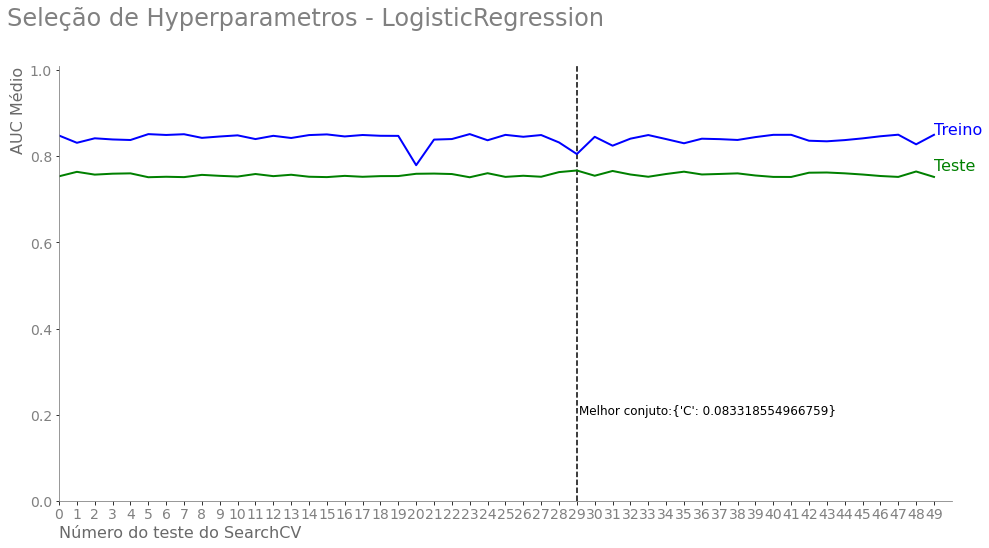

melhores hyperparametros : {'C': 0.083318554966759}
Melhor modelo            : LogisticRegression(C=0.083318554966759, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 1.4701863219523719},0.753652,0.848303,0.051020,0.011439,0.054308,0.042570,0.006756,0.001902,35
1,{'C': 0.4118160756893783},0.764000,0.831467,0.049981,0.011113,0.030312,0.007027,0.007055,0.001770,5
2,{'C': 0.9053540626702383},0.757553,0.841896,0.050171,0.011445,0.038337,0.007437,0.006686,0.001570,23
3,{'C': 0.7253795576272533},0.759724,0.839213,0.050090,0.011354,0.035492,0.007549,0.006696,0.001602,14
4,{'C': 0.6581908649330699},0.760475,0.837951,0.049789,0.011326,0.034279,0.007149,0.006616,0.001481,11
5,{'C': 1.8813554402370531},0.751508,0.851588,0.050862,0.011441,0.059865,0.041703,0.007115,0.001704,49
6,{'C': 1.6174233026987184},0.752573,0.849653,0.051334,0.011400,0.048544,0.009635,0.006606,0.001603,40
7,{'C': 1.8493820344847822},0.751735,0.851367,0.050930,0.011451,0.052264,0.013300,0.007119,0.002249,48
8,{'C': 0.9852339706273714},0.756962,0.842927,0.050274,0.011457,0.038239,0.005606,0.006218,0.001459,25
9,{'C': 1.2427121046498233},0.754729,0.846087,0.050449,0.011513,0.042575,0.010889,0.006636,0.001410,29


In [132]:
parameters = {'C': uniform(loc=0, scale=2)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

resultados, melhor_modelo_lr, melhores_hyperparametros  = treina_modelo_randomized_search_cv(modelo,
                                                                                            x_cv,
                                                                                            y_cv,
                                                                                            parameters,
                                                                                            n_splits=5,
                                                                                            n_repeats=10,
                                                                                            n_iter=50,
                                                                                            seed=14715)

plota_treino_teste_auc('Seleção de Hyperparametros - LogisticRegression', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

resultados_treinamento(resultados, melhor_modelo_lr, melhores_hyperparametros, n = 10)

> Neste gráfico temos o valor médio de AUC obtido pelo CrossValidation para dados de **Treino** e **Teste**. O Melhor Seleção de Hyperparametro foi C = **0.82**

## 4.3) Arvore de decissão



Fitting 50 folds for each of 50 candidates, totalling 2500 fits


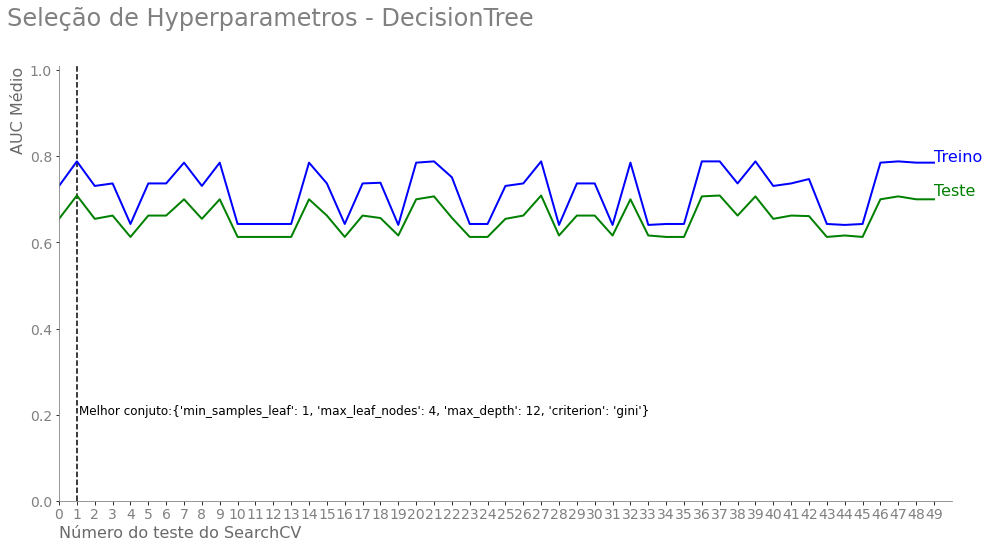

melhores hyperparametros : {'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_depth': 12, 'criterion': 'gini'}
Melhor modelo            : DecisionTreeClassifier(max_depth=12, max_leaf_nodes=4)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.654858,0.731251,0.057270,0.020255,0.009813,0.003101,0.007055,0.001813,29
1,"{'min_samples_leaf': 1, 'max_leaf_nodes': 4, '...",0.709015,0.788286,0.073198,0.011682,0.008015,0.000926,0.006409,0.000734,1
2,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.654858,0.731251,0.057270,0.020255,0.008855,0.000959,0.006408,0.000870,29
3,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.662439,0.737084,0.059803,0.012855,0.007795,0.001039,0.006496,0.001062,16
4,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.612826,0.642926,0.049854,0.018431,0.008175,0.002035,0.008160,0.003242,39
5,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.662439,0.737084,0.059803,0.012855,0.007796,0.000872,0.006477,0.001062,16
6,"{'min_samples_leaf': 1, 'max_leaf_nodes': 3, '...",0.662439,0.737084,0.059803,0.012855,0.007676,0.000967,0.006407,0.000733,16
7,"{'min_samples_leaf': 4, 'max_leaf_nodes': 4, '...",0.700229,0.785354,0.073212,0.013287,0.010074,0.001947,0.007053,0.001778,8
8,"{'min_samples_leaf': 2, 'max_leaf_nodes': 3, '...",0.654858,0.731251,0.057270,0.020255,0.008154,0.001006,0.006478,0.001004,29
9,"{'min_samples_leaf': 3, 'max_leaf_nodes': 4, '...",0.700229,0.785354,0.073212,0.013287,0.009646,0.000938,0.006516,0.000963,8


In [133]:
parameters = {'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 5),
              'max_leaf_nodes'  : np.arange(2, 5)
             }
modelo = DecisionTreeClassifier()

resultados, melhor_modelo_arvore, melhores_hyperparametros  = treina_modelo_randomized_search_cv(modelo,
                                                                                                  x_cv,
                                                                                                  y_cv,
                                                                                                  parameters,
                                                                                                  n_splits=5,
                                                                                                  n_repeats=10,
                                                                                                  n_iter=50,
                                                                                                  seed=14715)
plota_treino_teste_auc('Seleção de Hyperparametros - DecisionTree', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

resultados_treinamento(resultados, melhor_modelo_arvore, melhores_hyperparametros, n = 10)

## 4.4) Forest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators'    : [10, 50, 100, 150, 200],
              'max_depth'       : np.arange(1, 21),
              'criterion'       : ['gini', 'entropy'],
              'min_samples_leaf': np.arange(1, 5),
              'max_leaf_nodes'  : np.arange(2, 5)
             }
modelo = RandomForestClassifier(max_depth=2, random_state=0)

resultados, melhor_modelo_forest, melhores_hyperparametros  = treina_modelo_randomized_search_cv(modelo,
                                                                                                  x_cv,
                                                                                                  y_cv,
                                                                                                  parameters,
                                                                                                  n_splits=5,
                                                                                                  n_repeats=10,
                                                                                                  n_iter=25,
                                                                                                  seed=14715)

plota_treino_teste_auc('Seleção de Hyperparametros - RandomForest', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

resultados_treinamento(resultados, melhor_modelo_forest, melhores_hyperparametros, n = 10)

Fitting 50 folds for each of 25 candidates, totalling 1250 fits


## 4.5) Support Vector Classification.

In [ ]:
from sklearn.svm import SVC

parameters = {'kernel'          : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C'               : uniform(loc=0, scale=2),
              'gamma'           : ['scale', 'auto'],
              'shrinking'       : [True, False]
             }

modelo = SVC()

resultados, melhor_modelo_svc, melhores_hyperparametros  = treina_modelo_randomized_search_cv(modelo,
                                                                                                  x_cv,
                                                                                                  y_cv,
                                                                                                  parameters,
                                                                                                  n_splits=5,
                                                                                                  n_repeats=10,
                                                                                                  n_iter=10,
                                                                                                  seed=14715)

plota_treino_teste_auc('Seleção de Hyperparametros - SVC', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

resultados_treinamento(resultados, melhor_modelo_svc, melhores_hyperparametros, n = 10)

## 4.5) KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors'     : np.arange(1, 11),
              'p'               : [1, 2],
              'weights'         : ['uniform', 'distance'],
              'algorithm'       : ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

modelo = KNeighborsClassifier()

resultados, melhor_modelo_kn, melhores_hyperparametros  = treina_modelo_randomized_search_cv(modelo,
                                                                                                  x_cv,
                                                                                                  y_cv,
                                                                                                  parameters,
                                                                                                  n_splits=5,
                                                                                                  n_repeats=10,
                                                                                                  n_iter=50,
                                                                                                  seed=14715)

plota_treino_teste_auc('Seleção de Hyperparametros - KNeighborsClassifier', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparametros)

resultados_treinamento(resultados, melhor_modelo_kn, melhores_hyperparametros, n = 10)

# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax = ax.reshape(-1)

modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

for i, modelo in enumerate(modelos):
    plot_confusion_matrix(modelo, x_val, y_val, ax=ax[i])


In [ ]:
(tn, fp), (fn, tp) = confusion_matrix(y_val, melhor_modelo.predict(x_val))

In [ ]:
print(tn, fp, fn, tp)

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Curva ROC nos dados de Validação', loc = 'left', fontsize=16, color='gray')

for i, modelo in enumerate(modelos):
    plot_roc_curve(modelo , x_val, y_val, ax = ax) 
    
ax.plot([0, 1], [0, 1], color = "red", ls ='--')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.xticks(fontsize= 14, color='gray')
plt.yticks(fontsize= 14, color='gray')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Curva ROC nos dados de Treino-Teste', loc = 'left', fontsize=16, color='gray')

for i, modelo in enumerate(modelos):
    plot_roc_curve(modelo , x_cv, y_cv, ax = ax) 
    
ax.plot([0, 1], [0, 1], color = "red", ls ='--')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')   

plt.xticks(fontsize= 14, color='gray')
plt.yticks(fontsize= 14, color='gray')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()